In [1]:
"""
postprocess_case_1.py

Postprocessing script which you can adopt in your benchmark.
I recommend increasing the number of epochs you train the final
models to.
"""
import pickle

import pyMAISE as mai
import settings
from preprocessing import load_anomaly_data

# Initialize pyMAISE
mai.init(
    problem_type=settings.problem_type,
    verbosity=settings.verbosity,
    random_state=settings.random_state,
    cuda_visible_devices="1",  # Use GPU 1
)

# Load training/testing data
xtrain, xtest, ytrain, ytest, xscaler = load_anomaly_data(
    stack_series=False,
    multiclass=False,
    test_size=settings.test_size,
    non_faulty_frac=settings.non_faulty_frac,
    timestep_step=1,
)

# Read pickled configs
with open("/home/jacc/pyMAISE/docs/source/benchmarks/supporting/anomaly/configs/binary_case_1.pkl", "rb") as f:
    configs = pickle.load(f)

# Model postprocessing
postprocessor = mai.PostProcessor(
    data=(xtrain, xtest, ytrain, ytest),
    model_configs=[configs],
    new_model_settings={
        "LSTM": {"fitting_params": {"epochs": 2}},
    },
)

print(postprocessor.metrics())

for model in ["LSTM"]:
    for key, value in postprocessor.get_params(model_type=model).to_dict().items():
        print(f"{key}: {value[0]}")
    print()

2024-05-24 20:25:05.982008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 20:25:05.982042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 20:25:05.983489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-24 20:25:05.991281: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 20:25:06.748750: W tensorflow/compiler/tf2

Num GPUs Available:  1
xtrain shape: (220, 4500, 14)
xtest shape: (95, 4500, 14)
ytrain shape: (220, 2)
ytest shape: (95, 2)


2024-05-24 20:25:08.650312: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-24 20:25:08.650625: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-24 20:25:08.650864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/2


2024-05-24 20:25:14.644046: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-24 20:25:15.317299: I external/local_xla/xla/service/service.cc:168] XLA service 0x704e70e744d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-24 20:25:15.317330: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-05-24 20:25:15.323204: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716596715.430199 1091553 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 2/2
3/3 [==============================] - 0s 160ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 2s 719ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 1s 157ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 2s 674ms/step
  Model Types                           Parameter Configurations  \
3         GRU  {'LSTM_input_0_units': 43, 'LSTM_num_layers': ...   
2         GRU  {'LSTM_input_0_units': 70, 'LSTM_num_layers': ...   
0        LSTM  {'LSTM_input_0_units': 70, 'LSTM_num_layers': ...   
1        LSTM  {'LSTM_input_0_units': 43, 'LSTM_num_layers': ...   

   Train Accuracy  Train Recall  Train Precision  Train F1  Test Accuracy  \
3        0.590909      0.590909         0.590909  0.590909       0.631579   
2        0.509091      0.509091         0.509091  0.509091       0.505263   
0        0.495455      0.495455         0.495455  0.495455       0.494737   
1        0.495455      0.495455         0.495455  0.495455       0.49

In [2]:
postprocessor = mai.PostProcessor(
    data=(xtrain, xtest, ytrain, ytest),
    model_configs=[configs],
    new_model_settings={
        "GRU": {"fitting_params": {"epochs": 2}},
    },
)

print(postprocessor.metrics())

for model in ["GRU"]:
    for key, value in postprocessor.get_params(model_type=model).to_dict().items():
        print(f"{key}: {value[0]}")
    print()

Epoch 1/2
Epoch 2/2
3/3 [==============================] - 1s 163ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 2s 699ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 0s 146ms/step
Epoch 1/2
Epoch 2/2
3/3 [==============================] - 2s 672ms/step
  Model Types                           Parameter Configurations  \
0        LSTM  {'LSTM_input_0_units': 70, 'LSTM_num_layers': ...   
1        LSTM  {'LSTM_input_0_units': 43, 'LSTM_num_layers': ...   
2         GRU  {'LSTM_input_0_units': 70, 'LSTM_num_layers': ...   
3         GRU  {'LSTM_input_0_units': 43, 'LSTM_num_layers': ...   

   Train Accuracy  Train Recall  Train Precision  Train F1  Test Accuracy  \
0        0.504545      0.504545         0.504545  0.504545       0.505263   
1        0.504545      0.504545         0.504545  0.504545       0.505263   
2        0.495455      0.495455         0.495455  0.495455       0.494737   
3        0.495455      0.495455         0.495455  0.495455 

In [3]:
postprocessor.metrics()

,Model Types,Parameter Configurations,Train Accuracy,Train Recall,Train Precision,Train F1,Test Accuracy,Test Recall,Test Precision,Test F1
0,LSTM,"{'LSTM_input_0_units': 70, 'LSTM_num_layers': ...",0.504545,0.504545,0.504545,0.504545,0.505263,0.505263,0.505263,0.505263
1,LSTM,"{'LSTM_input_0_units': 43, 'LSTM_num_layers': ...",0.504545,0.504545,0.504545,0.504545,0.505263,0.505263,0.505263,0.505263
2,GRU,"{'LSTM_input_0_units': 70, 'LSTM_num_layers': ...",0.495455,0.495455,0.495455,0.495455,0.494737,0.494737,0.494737,0.494737
3,GRU,"{'LSTM_input_0_units': 43, 'LSTM_num_layers': ...",0.495455,0.495455,0.495455,0.495455,0.494737,0.494737,0.494737,0.494737


In [4]:
#from pyMAISE import PostProcessor

In [5]:
ytest.shape

(95, 2)

In [7]:
train_cm_ax, test_cm_ax = postprocessor.confusion_matrix(model_type="LSTM")



NameError: name 'ConfusionMatrixDisplay' is not defined

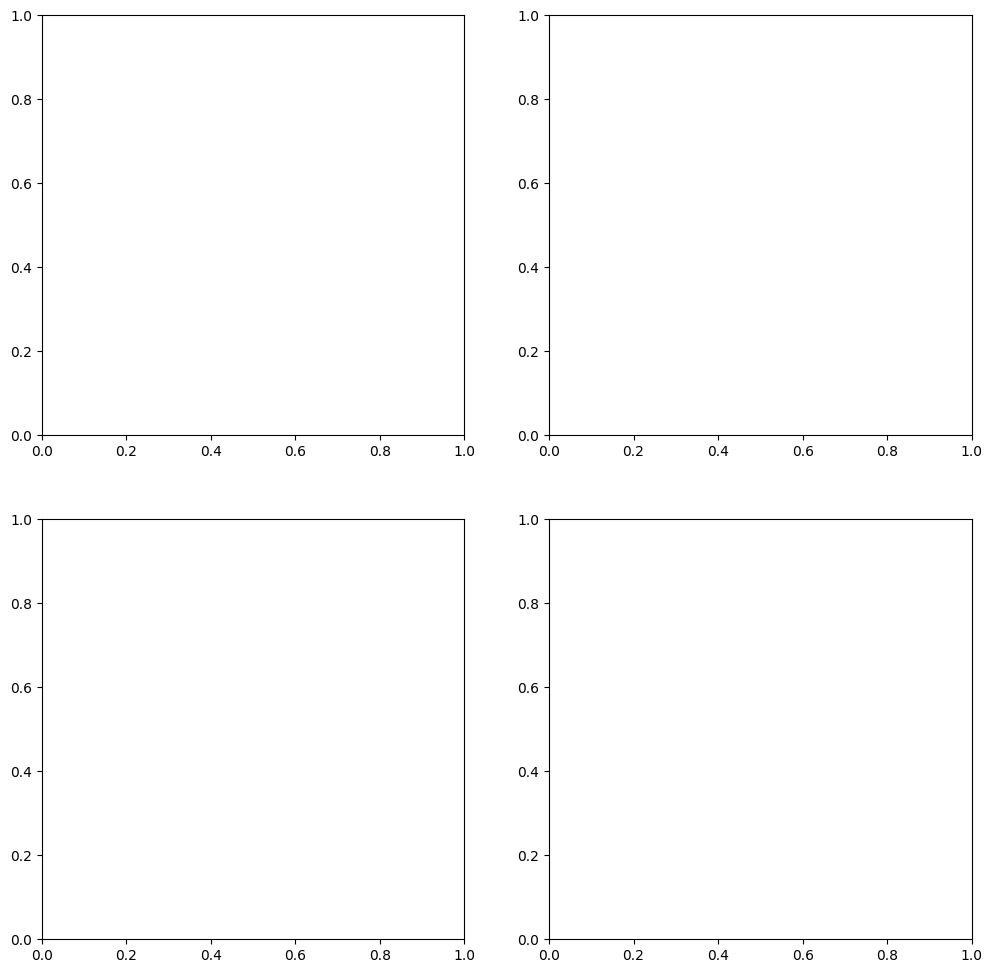